In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import sklearn

In [2]:
data = pd.read_csv('data/fidobiz attempts (3).csv')
data.head()

,CLIENT_ID,KYB_DATE,KYB_REF,BUSINESS_NAME_DURATION,PROVIDED_SERVICES_DURATION,BUSINESS_INCOME_LAST_MONTH_ANSWER,AGE,DEPENDENTS,EMPLOYMENT,INCOME_VALUE,...,CLOSEDDATE,DISBURSEMENTDATE,DTR,LN,LAST_EXPECTED_REPAYMENT,FIRST_DUE_INSTALLMENT,DAYS_FROM_FIRST_DUE_INSTALLMENT,TOTAL_REPAYMENT_AMOUNT,FIDOBIZ_LOAN,RNK
0,351248003,2024-10-18,233242343739,30,52,"Below 1,000 GHS",25,4,Employed part-time,Below 350 GHS,...,2024-11-30 09:35:27.000,2024-10-18 01:38:08.000,10.0,0.0,2024-11-20 00:00:00.000,NaN,NaN,217.04,0,1
1,104469457,2024-10-30,233208044879,8,17,"1,000 - 2,000 GHS",33,3,Self-employed,Above 1800 GHS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
2,761512028,2024-09-23,233249821821,49,62,"Above 15,000 GHS",34,1,Self-employed,Above 1800 GHS,...,NaN,2024-09-23 01:01:26.000,105.0,0.0,2024-10-23 00:00:00.000,2024-10-23 00:00:00.000,105.0,NaN,0,1
3,35342310,2024-11-21,233532890060,37,11,"Below 1,000 GHS",22,1,Employed full-time,701 GHS - 1000 GHS,...,2025-01-27 18:14:04.000,2024-12-29 10:49:02.000,0.0,0.0,2025-01-28 00:00:00.000,NaN,NaN,298.58,0,1
4,638957550,2024-11-21,233243918012,9,4,"2,001 - 5,000 GHS",144,3,Self-employed,Above 1800 GHS,...,NaN,2024-11-21 14:31:42.000,44.0,0.0,2024-12-23 00:00:00.000,2024-12-23 00:00:00.000,44.0,NaN,0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23689 entries, 0 to 23688
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CLIENT_ID                          23689 non-null  int64  
 1   KYB_DATE                           23689 non-null  object 
 2   KYB_REF                            23689 non-null  int64  
 3   BUSINESS_NAME_DURATION             23689 non-null  int64  
 4   PROVIDED_SERVICES_DURATION         23689 non-null  int64  
 5   BUSINESS_INCOME_LAST_MONTH_ANSWER  23689 non-null  object 
 6   AGE                                23689 non-null  int64  
 7   DEPENDENTS                         23689 non-null  object 
 8   EMPLOYMENT                         23689 non-null  object 
 9   INCOME_VALUE                       23689 non-null  object 
 10  POSITION                           22715 non-null  object 
 11  REFERENCE1_PHONE_NUMBER            23689 non-null  int

In [4]:
data['disbursed'] = data['DISBURSEMENTDATE'].apply(lambda x: 0 if pd.isnull(x) else 1)
data['defaulted'] = data['DAYS_FROM_FIRST_DUE_INSTALLMENT'].apply(lambda x: 1 if x > 2 else 0)
data['pfraud'] = data['CLOSEDDATE'].apply(lambda x: 0 if pd.isnull(x) else 1)

In [5]:
df = data[['KYB_DATE','BUSINESS_NAME_DURATION', 'PROVIDED_SERVICES_DURATION', 'BUSINESS_INCOME_LAST_MONTH_ANSWER', 'AGE','POSITION', 'INDUSTRY' ,
            'FIDOBIZ_LOAN', 'disbursed', 'defaulted', 'pfraud']]

In [6]:
df = df[df['disbursed'] == 1]

Explorition Data Features That Impact Default Rates

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [8]:
label_encoder = LabelEncoder()

cat_cols = ['BUSINESS_INCOME_LAST_MONTH_ANSWER','POSITION', 'INDUSTRY']
for  col in cat_cols:
    df[col] = df[col].str.lower()

for  col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])


In [9]:
df.head()

,KYB_DATE,BUSINESS_NAME_DURATION,PROVIDED_SERVICES_DURATION,BUSINESS_INCOME_LAST_MONTH_ANSWER,AGE,POSITION,INDUSTRY,FIDOBIZ_LOAN,disbursed,defaulted,pfraud
0,2024-10-18,30,52,4,25,3486,8,0,1,0,1
2,2024-09-23,49,62,3,34,5232,31,0,1,1,0
3,2024-11-21,37,11,4,22,5281,20,0,1,0,1
4,2024-11-21,9,4,1,144,1018,12,0,1,1,0
7,2024-10-20,20,22,0,25,5762,8,0,1,1,0


In [10]:
X = df.drop(columns= ['KYB_DATE','disbursed', 'defaulted', 'pfraud'])
y = df[['defaulted']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14265 entries, 0 to 23687
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   KYB_DATE                           14265 non-null  object
 1   BUSINESS_NAME_DURATION             14265 non-null  int64 
 2   PROVIDED_SERVICES_DURATION         14265 non-null  int64 
 3   BUSINESS_INCOME_LAST_MONTH_ANSWER  14265 non-null  int64 
 4   AGE                                14265 non-null  int64 
 5   POSITION                           14265 non-null  int64 
 6   INDUSTRY                           14265 non-null  int64 
 7   FIDOBIZ_LOAN                       14265 non-null  int64 
 8   disbursed                          14265 non-null  int64 
 9   defaulted                          14265 non-null  int64 
 10  pfraud                             14265 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 1.3+ MB


In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
log_reg = LogisticRegression(random_state=42)

# Train the model
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

/Users/fido_josephine/Documents/New-Fraud-Rules/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.76

Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86      2164
           1       0.00      0.00      0.00       689

    accuracy                           0.76      2853
   macro avg       0.38      0.50      0.43      2853
weighted avg       0.58      0.76      0.65      2853


Confusion Matrix:
 [[2164    0]
 [ 689    0]]


/Users/fido_josephine/Documents/New-Fraud-Rules/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/fido_josephine/Documents/New-Fraud-Rules/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/fido_josephine/Documents/New-Fraud-Rules/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

In [15]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
})
coefficients.head(10)

,Feature,Coefficient
0,BUSINESS_NAME_DURATION,0.013986
1,PROVIDED_SERVICES_DURATION,-0.088754
2,BUSINESS_INCOME_LAST_MONTH_ANSWER,0.023675
3,AGE,-0.113374
4,POSITION,0.024884
5,INDUSTRY,-0.015144
6,FIDOBIZ_LOAN,-0.098685


In [16]:
import matplotlib.pyplot as plt

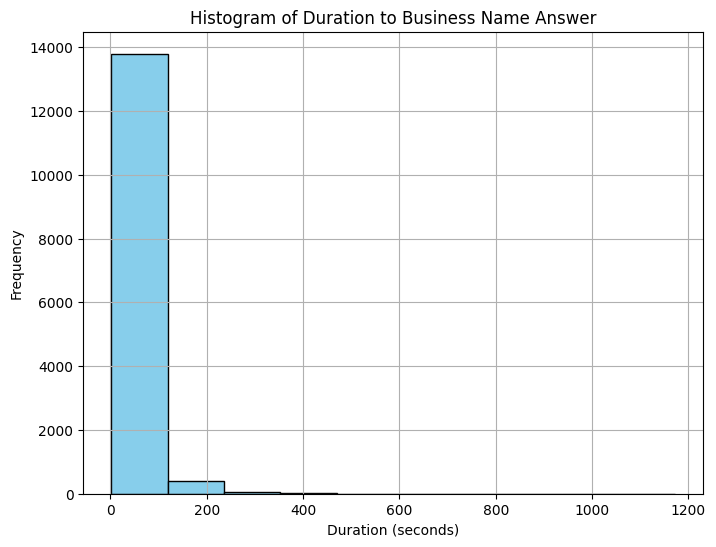

In [17]:
plt.figure(figsize=(8, 6))
plt.hist(df['BUSINESS_NAME_DURATION'], bins=10, edgecolor='black', color='skyblue')
plt.title('Histogram of Duration to Business Name Answer')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [18]:
duration_bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
duration_labels = ['0-50 sec', '50-100 sec', '100-150 sec', '150-200 sec', '200-250 sec', '250-300 sec', '300-350 sec', '350-400 sec', '400-450 sec', '450-500 sec']

df['duration_bin'] = pd.cut(df['BUSINESS_NAME_DURATION'], bins=duration_bins, labels=duration_labels, right=False)

In [19]:
df.head()

,KYB_DATE,BUSINESS_NAME_DURATION,PROVIDED_SERVICES_DURATION,BUSINESS_INCOME_LAST_MONTH_ANSWER,AGE,POSITION,INDUSTRY,FIDOBIZ_LOAN,disbursed,defaulted,pfraud,duration_bin
0,2024-10-18,30,52,4,25,3486,8,0,1,0,1,0-50 sec
2,2024-09-23,49,62,3,34,5232,31,0,1,1,0,0-50 sec
3,2024-11-21,37,11,4,22,5281,20,0,1,0,1,0-50 sec
4,2024-11-21,9,4,1,144,1018,12,0,1,1,0,0-50 sec
7,2024-10-20,20,22,0,25,5762,8,0,1,1,0,0-50 sec


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14265 entries, 0 to 23687
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   KYB_DATE                           14265 non-null  object  
 1   BUSINESS_NAME_DURATION             14265 non-null  int64   
 2   PROVIDED_SERVICES_DURATION         14265 non-null  int64   
 3   BUSINESS_INCOME_LAST_MONTH_ANSWER  14265 non-null  int64   
 4   AGE                                14265 non-null  int64   
 5   POSITION                           14265 non-null  int64   
 6   INDUSTRY                           14265 non-null  int64   
 7   FIDOBIZ_LOAN                       14265 non-null  int64   
 8   disbursed                          14265 non-null  int64   
 9   defaulted                          14265 non-null  int64   
 10  pfraud                             14265 non-null  int64   
 11  duration_bin                       14255 non-n

In [21]:
dur_dr = df.groupby('duration_bin').agg(
    default_count=('defaulted', 'sum'),
    total_count=('KYB_DATE', 'count')
)
dur_dr ['dr1'] = dur_dr ['default_count'] / dur_dr ['total_count']

/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_64731/3021689676.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dur_dr = df.groupby('duration_bin').agg(


In [22]:
dur_dr.head(10)

,default_count,total_count,dr1
duration_bin,,,
0-50 sec,2775,11448,0.242400
50-100 sec,517,2117,0.244214
100-150 sec,96,440,0.218182
150-200 sec,28,129,0.217054
200-250 sec,14,62,0.225806
250-300 sec,9,33,0.272727
300-350 sec,2,9,0.222222
350-400 sec,2,10,0.200000
400-450 sec,0,6,0.000000


In [23]:
dur_dr = dur_dr.reset_index()

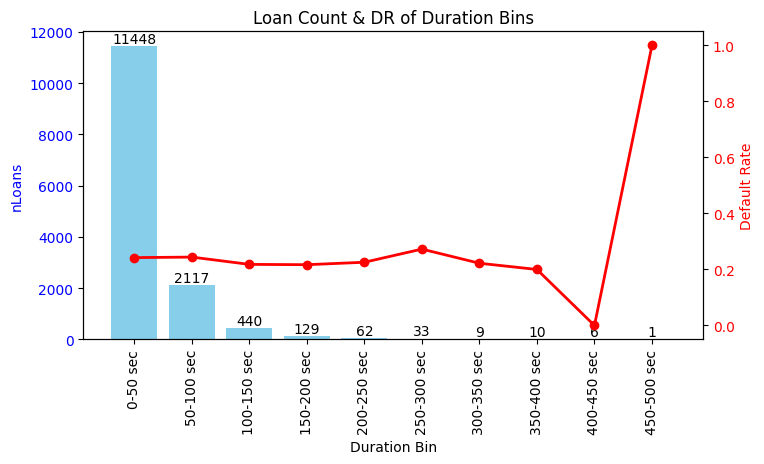

In [24]:
fig, ax1 = plt.subplots(figsize=(8, 4))


bars = ax1.bar(dur_dr['duration_bin'], dur_dr['total_count'], color='skyblue', label='Count')
ax1.set_xlabel('Duration Bin')
ax1.set_ylabel('nLoans', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax1.set_xticks(range(len(dur_dr['duration_bin'])))
ax1.set_xticklabels(dur_dr['duration_bin'], rotation=90)
# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(dur_dr['duration_bin'],dur_dr['dr1'], color='red', marker='o', linestyle='-', linewidth=2, label='Rate')
ax2.set_ylabel('Default Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')

for bar in bars: 
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height, f'{height}', ha='center', va='bottom', fontsize=10, color='black')

# Add a title
plt.title('Loan Count & DR of Duration Bins')
plt.show()

Total KYB Duration vs DR

In [25]:
data = pd.read_csv('data/fidobiz attempts 2024.csv')
data.head(2)

,CLIENT_ID,KYB_DATE,KYB_REF,KYB_SURVEY_DURATION,FIDOBIZ_LOAN,DISBURSED,DEFAULTED,PFRAUD
0,564,2024-09-19,2.335360e+11,40.0,0,0,0,1
1,1122,2024-02-06,NaN,NaN,0,0,0,1


In [26]:
data = data[data['FIDOBIZ_LOAN'] == 1]

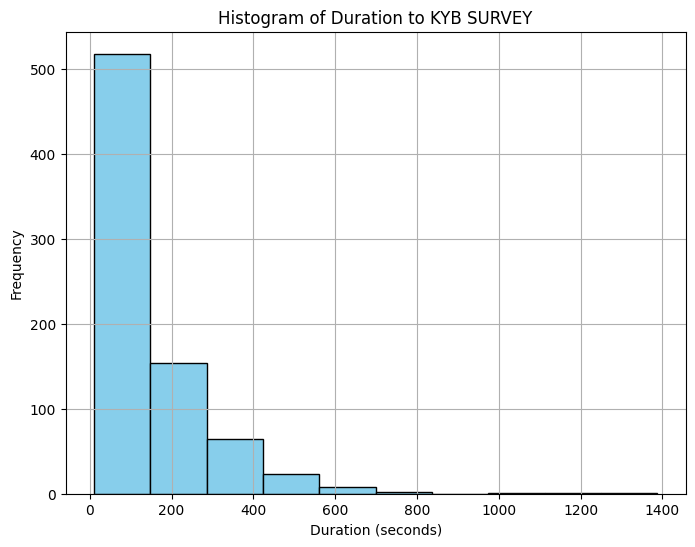

In [27]:
plt.figure(figsize=(8, 6))
plt.hist(data['KYB_SURVEY_DURATION'], bins=10, edgecolor='black', color='skyblue')
plt.title('Histogram of Duration to KYB SURVEY')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [28]:
duration_bins = [0, 100, 200,300, 400,500,  600,700,  800,900,  1000,1100, 1200,1300,  1400,1500, 1600, 1800, 1900, 2000]
duration_labels = ['0-100 sec','100-200 sec',  '200-300 sec','300-400 sec', '400-500 sec','500-600 sec','600-700 sec',  '700-800 sec','800-900 sec' '900-1000 sec', 
                   '1000-1100 sec','1100-1200 sec', '1200-1300 sec', '1300-1400 sec','1400-1500 sec' , '1500-1600 sec','1600-1700 sec', '1700-1800 sec', '1800-1900 sec', '1900-2000 sec']

data['duration_bin'] = pd.cut(data['KYB_SURVEY_DURATION'], bins=duration_bins, labels=duration_labels, right=False)

dur_dr = data.groupby('duration_bin').agg(
    default_count=('DEFAULTED', 'sum'),
    total_count=('KYB_DATE', 'count')
)
dur_dr ['dr1'] = dur_dr ['default_count'] / dur_dr ['total_count']
dur_dr = dur_dr.reset_index()
dur_dr

/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_64731/1915659028.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dur_dr = data.groupby('duration_bin').agg(


,duration_bin,default_count,total_count,dr1
0,0-100 sec,58,378,0.153439
1,100-200 sec,28,219,0.127854
2,200-300 sec,5,84,0.059524
3,300-400 sec,6,50,0.120000
4,400-500 sec,3,21,0.142857
5,500-600 sec,0,11,0.000000
6,600-700 sec,0,4,0.000000
7,700-800 sec,0,2,0.000000
8,800-900 sec900-1000 sec,0,0,NaN
9,1000-1100 sec,0,1,0.000000


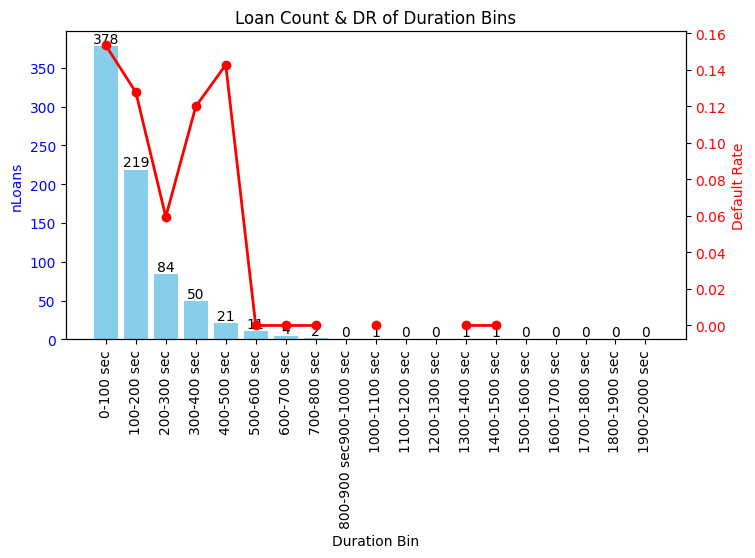

In [29]:
fig, ax1 = plt.subplots(figsize=(8, 4))


bars = ax1.bar(dur_dr['duration_bin'], dur_dr['total_count'], color='skyblue', label='Count')
ax1.set_xlabel('Duration Bin')
ax1.set_ylabel('nLoans', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax1.set_xticks(range(len(dur_dr['duration_bin'])))
ax1.set_xticklabels(dur_dr['duration_bin'], rotation=90)
# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(dur_dr['duration_bin'],dur_dr['dr1'], color='red', marker='o', linestyle='-', linewidth=2, label='Rate')
ax2.set_ylabel('Default Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')

for bar in bars: 
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height, f'{height}', ha='center', va='bottom', fontsize=10, color='black')

# Add a title
plt.title('Loan Count & DR of Duration Bins')
plt.show()

In [30]:
duration_bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
dur_labels = ['0-50 sec', '50-100 sec', '100-150 sec', '150-200 sec', '200-250 sec', '250-300 sec', '300-350 sec', '350-400 sec', 
              '400-450 sec', '450-500 sec', '500-550 sec', '550-600 sec', '600-650 sec', '650-700 sec', '700-750 sec' , '750-800 sec', '800-850 sec',
              '850-900 sec' , '900-950 sec', '950-1000 sec']

data['dur_bin'] = pd.cut(data['KYB_SURVEY_DURATION'], bins=duration_bins, labels=dur_labels, right=False)

dur_dr = data.groupby('dur_bin').agg(
    default_count=('DEFAULTED', 'sum'),
    total_count=('KYB_DATE', 'count')
)

dur_dr ['dr1'] = dur_dr ['default_count'] / dur_dr ['total_count']
dur_dr = dur_dr.reset_index()
dur_dr


/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_64731/4057328553.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dur_dr = data.groupby('dur_bin').agg(


,dur_bin,default_count,total_count,dr1
0,0-50 sec,19,102,0.186275
1,50-100 sec,39,276,0.141304
2,100-150 sec,20,143,0.139860
3,150-200 sec,8,76,0.105263
4,200-250 sec,5,48,0.104167
5,250-300 sec,0,36,0.000000
6,300-350 sec,4,29,0.137931
7,350-400 sec,2,21,0.095238
8,400-450 sec,1,11,0.090909
9,450-500 sec,2,10,0.200000


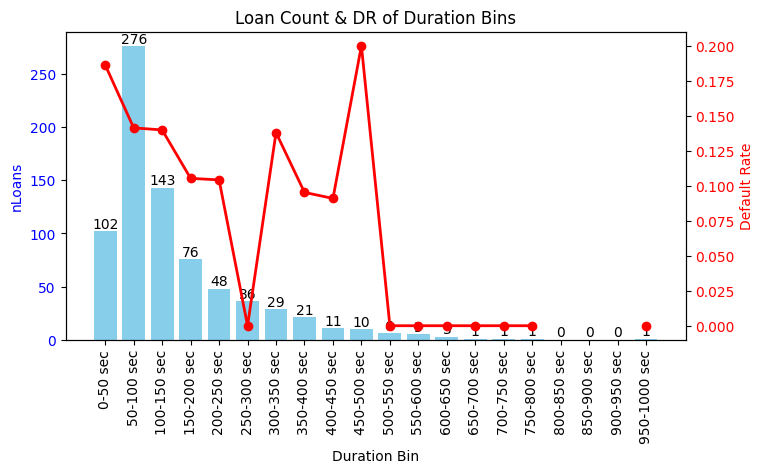

In [31]:
fig, ax1 = plt.subplots(figsize=(8, 4))


bars = ax1.bar(dur_dr['dur_bin'], dur_dr['total_count'], color='skyblue', label='Count')
ax1.set_xlabel('Duration Bin')
ax1.set_ylabel('nLoans', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax1.set_xticks(range(len(dur_dr['dur_bin'])))
ax1.set_xticklabels(dur_dr['dur_bin'], rotation=90)
# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(dur_dr['dur_bin'],dur_dr['dr1'], color='red', marker='o', linestyle='-', linewidth=2, label='Rate')
ax2.set_ylabel('Default Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')

for bar in bars: 
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height, f'{height}', ha='center', va='bottom', fontsize=10, color='black')

# Add a title
plt.title('Loan Count & DR of Duration Bins')
plt.show()